In [2]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from pycards import *
from gravecardutils import *

In [3]:
deck = Deck(include_jokers=True)
statList = [1, 2, 3, 4, 5]                      # Number of cards to draw into hand
targetList = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]    # Target rank to get below based on skill
statsuit = 'c'                                  # Suit of required stat
deck.shuffle()                                  # Shuffle deck
trials = 50000                                  # Number of trial tests

In [4]:
successProb = []           # Probability of success including epic
failureProb = []           # Probability of failure including epic
epicSuccessProb = []       # Probability of epic success
epicFailureProb = []       # Probability of epic failure

In [5]:
for stat in statList:
    for target in targetList:
        results = []
        results_epic_success = []
        results_epic_fail = []

        for t in xrange(trials):
            hand = deck.draw(stat)         # Draw a hand
            if len(hand) is 0:             # If hand is empty...
                deck.reset()               # Reset deck
                deck.shuffle()             # Shuffle deck
                hand = deck.draw(stat)     # Redraw hand

            p = passtest(hand, target, statsuit=statsuit)          # Check if hand passes test
            if not p:                                              # If it does not pass...
                b = facecardbonus(hand)                            # Check if there are face card bonuses
                if b > 0:                                          # If there is a bonus...
                    hand += deck.draw(b)                           # Draw bonus cards into hand
                    p = passtest(hand, target, statsuit=statsuit)  # Recheck to see of hand passes test
            results.append(p)

            j = jokercheck(hand)                                   # Check hand for jokers
            if j:
                deck.reset()                                       # Reset and shuffle if joker
                deck.shuffle()
                if p:
                    results_epic_success.append(j)
                if not p:
                    results_epic_fail.append(j)
            if not j:
                results_epic_success.append(j)
                results_epic_fail.append(j)
        
        successProb.append(100 * sum(results) / float(trials))
        failureProb.append(100 - 100 * sum(results) / float(trials))
        epicSuccessProb.append(100 * sum(results_epic_success) / float(trials))
        epicFailureProb.append(100 * sum(results_epic_fail) / float(trials))

In [6]:
successProb = np.array(successProb).reshape((5, 10))
failureProb = np.array(failureProb).reshape((5, 10))
epicSuccessProb = np.array(epicSuccessProb).reshape((5, 10))
epicFailureProb = np.array(epicFailureProb).reshape((5, 10))

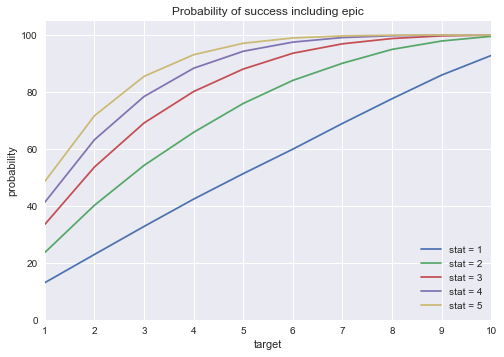

In [7]:
plt.plot(targetList, successProb[0], label='stat = 1')
plt.plot(targetList, successProb[1], label='stat = 2')
plt.plot(targetList, successProb[2], label='stat = 3')
plt.plot(targetList, successProb[3], label='stat = 4')
plt.plot(targetList, successProb[4], label='stat = 5')
plt.axis([1,10,0,105])
plt.ylabel('probability')
plt.xlabel('target')
plt.legend(loc='lower right')
plt.title('Probability of success including epic')
plt.show()

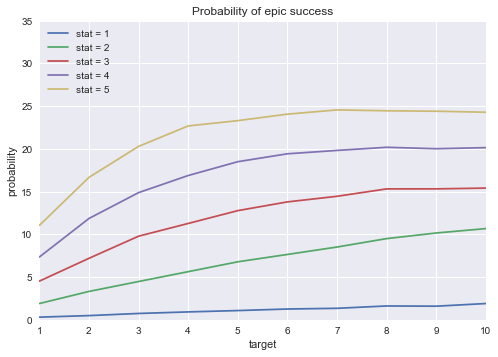

In [8]:
plt.plot(targetList, epicSuccessProb[0], label='stat = 1')
plt.plot(targetList, epicSuccessProb[1], label='stat = 2')
plt.plot(targetList, epicSuccessProb[2], label='stat = 3')
plt.plot(targetList, epicSuccessProb[3], label='stat = 4')
plt.plot(targetList, epicSuccessProb[4], label='stat = 5')
plt.axis([1,10,0,35])
plt.ylabel('probability')
plt.xlabel('target')
plt.legend(loc='upper left')
plt.title('Probability of epic success')
plt.show()

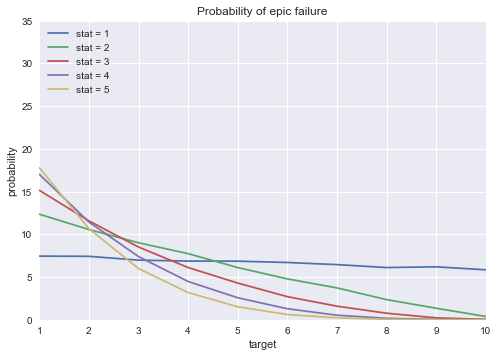

In [9]:
plt.plot(targetList, epicFailureProb[0], label='stat = 1')
plt.plot(targetList, epicFailureProb[1], label='stat = 2')
plt.plot(targetList, epicFailureProb[2], label='stat = 3')
plt.plot(targetList, epicFailureProb[3], label='stat = 4')
plt.plot(targetList, epicFailureProb[4], label='stat = 5')
plt.axis([1,10,0,35])
plt.ylabel('probability')
plt.xlabel('target')
plt.legend(loc='upper left')
plt.title('Probability of epic failure')
plt.show()